In [9]:
import pandas as pd


In [10]:
df = pd.read_csv(r"C:\Users\sarad\OneDrive\house_rental_dataaa.csv")
df.head()

,sr. no,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sr. no       645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [12]:
df.describe()

,sr. no,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [13]:
df.isnull().sum()

sr. no         0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

               sr. no      Sqft     Floor  TotalFloor   Bedroom  Living.Room  \
sr. no       1.000000 -0.065182 -0.021299   -0.039687 -0.008638    -0.027035   
Sqft        -0.065182  1.000000  0.143249    0.304515  0.615608     0.455940   
Floor       -0.021299  0.143249  1.000000    0.564221  0.023986    -0.023563   
TotalFloor  -0.039687  0.304515  0.564221    1.000000  0.067298     0.029373   
Bedroom     -0.008638  0.615608  0.023986    0.067298  1.000000     0.526532   
Living.Room -0.027035  0.455940 -0.023563    0.029373  0.526532     1.000000   
Bathroom    -0.007877  0.728869  0.099772    0.146132  0.643083     0.546826   
Price       -0.077512  0.825514  0.244553    0.333631  0.467059     0.328788   

             Bathroom     Price  
sr. no      -0.007877 -0.077512  
Sqft         0.728869  0.825514  
Floor        0.099772  0.244553  
TotalFloor   0.146132  0.333631  
Bedroom      0.643083  0.467059  
Living.Room  0.546826  0.328788  
Bathroom     1.000000  0.605542  
Price  

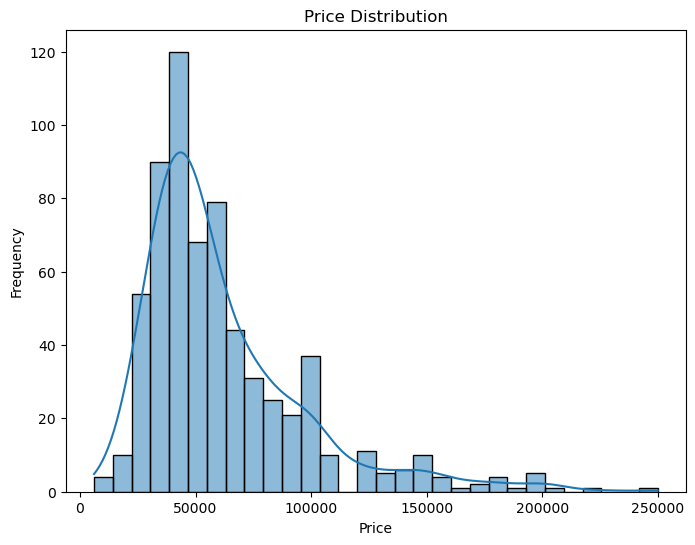

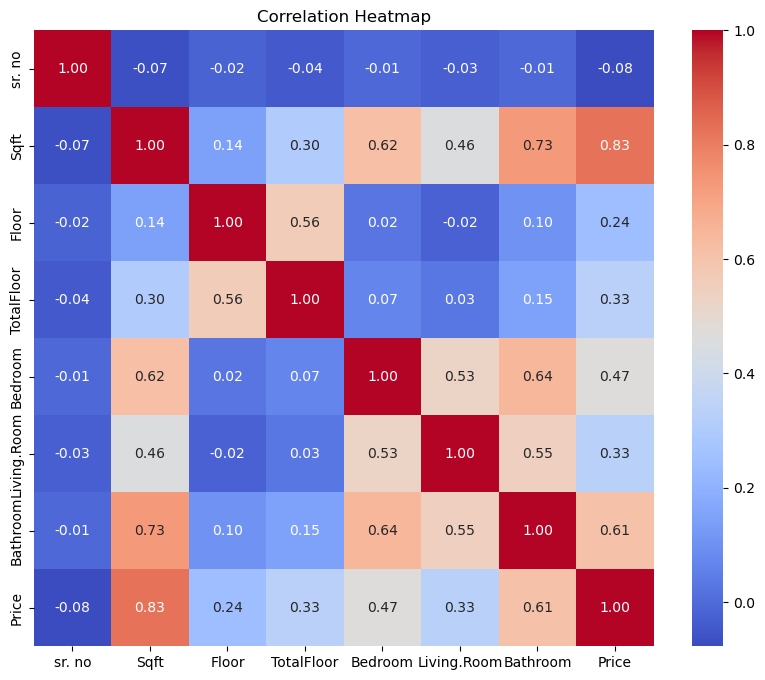

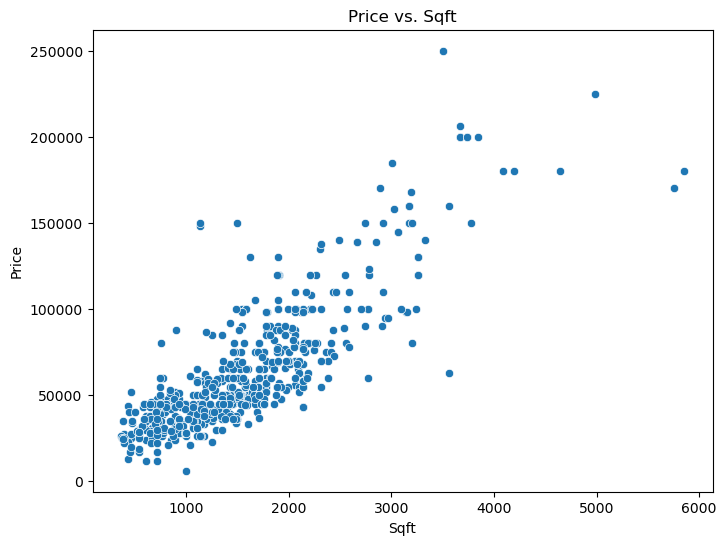

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt



# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualization of the distribution of prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of Price vs. Sqft
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sqft', y='Price', data=df)
plt.title('Price vs. Sqft')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.show()

In [63]:
#creating input features and target variables

x = df[['Sqft', 'Floor','TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']]
y = df[['Price']]
print(x)
print(y)

         Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom
0    1177.698      2           7        2            2         2
1    2134.800      5           7        4            2         2
2    1138.560      5           7        2            2         1
3    1458.780      2           7        3            2         2
4     967.776     11          14        3            2         2
..        ...    ...         ...      ...          ...       ...
640  1359.156      7          15        3            2         2
641   377.148      4          10        1            1         1
642   740.064     13          14        1            1         1
643  1707.840      3          14        3            2         2
644  1376.946      6           7        3            2         1

[645 rows x 6 columns]
     Price
0    62000
1    78000
2    58000
3    45000
4    45000
..     ...
640  45000
641  24800
642  45000
643  65000
644  36000

[645 rows x 1 columns]


In [64]:
model = KNeighborsRegressor(n_neighbors = 2)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

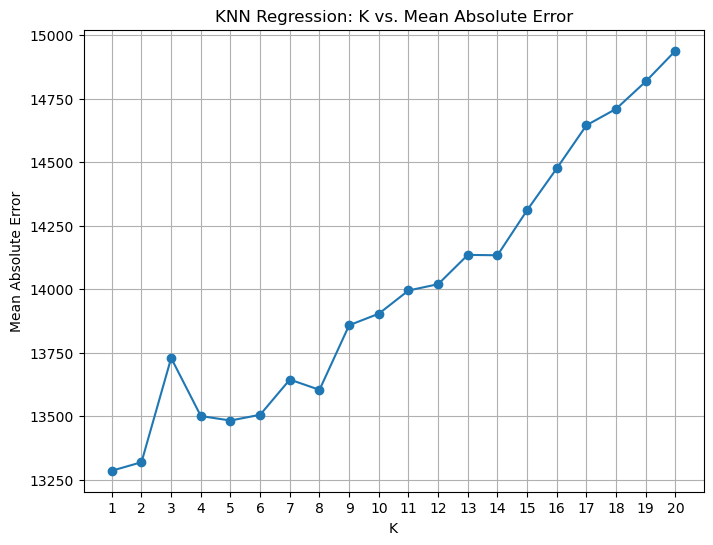

Best K value: 1


In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score


knn_regressor = KNeighborsRegressor()


k_values = range(1, 21)

mae_scores = []
for k in k_values:
    knn_regressor.n_neighbors = k
    scores = cross_val_score(knn_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_scores.append(-scores.mean())


plt.figure(figsize=(8, 6))
plt.plot(k_values, mae_scores, marker='o')
plt.title('KNN Regression: K vs. Mean Absolute Error')
plt.xlabel('K')
plt.ylabel('Mean Absolute Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best K value
best_k = k_values[mae_scores.index(min(mae_scores))]
print(f"Best K value: {best_k}")